# IQR

### implements of IQR

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
import numpy as np

In [33]:
# read dataset
grade_math = pd.read_csv('uk_math_scores_dataset.csv')

In [34]:
Q1 = np.percentile(grade_math['Math_Score'], 25)  # چارک اول (25%)
Q3 = np.percentile(grade_math['Math_Score'], 75)  # چارک سوم (75%)
IQR = Q3 - Q1
print(f"IQR = {IQR}")
print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")

IQR = 2.9000000000000004
Q1 = 12.5
Q3 = 15.4


In [35]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

8.149999999999999
19.75


In [36]:
grade_math_anomaly = grade_math[(grade_math['Math_Score']<lower_bound) | (grade_math['Math_Score']>upper_bound)]
count = len(grade_math_anomaly) 
print(count)

9


In [37]:
grade_math_anomaly

,Name,Gender,Class,Math_Score
51,Ruby Allen,Female,7B,5.1
70,Freya Lewis,Female,7B,7.8
95,Benjamin Clark,Male,7B,20.0
148,Alfie Garcia,Male,7A,7.5
158,Oscar Clark,Male,7A,1.5
172,Logan Moore,Male,7C,4.4
175,Charlie Smith,Male,7B,6.7
218,Jack White,Male,7D,6.2
241,George Scott,Male,7C,6.6


In [38]:
def plot_anomaly_grade_IQR(score_data,threshold):
    grade = score_data['Math_Score'].copy().sort_values(ascending=False)
    ranks = np.linspace(1, len(grade), len(grade))
    q1 = grade.quantile(0.25)
    q3 = grade.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (threshold * iqr)
    lower_bound = q1 - (threshold * iqr)
    mask_anomalies = (grade > upper_bound) | (grade < lower_bound)
    # draw a plot
    plt.figure(figsize=(12, 6), dpi=100)
    # normal point (blue)
    plt.plot(ranks[~mask_anomalies], grade[~mask_anomalies], 'o', color='blue', alpha=0.7, label='Normal Players')
    # anomali point (red)
    plt.plot(ranks[mask_anomalies], grade[mask_anomalies], 'o', color='red', alpha=0.9, label='Anomalies')
    # draw lower_bound line or upper_bound line
    plt.axhline(upper_bound, color='green', linestyle='--', alpha=0.5, label=f'Upper Bound ({upper_bound:.1f})')
    plt.axhline(lower_bound, color='purple', linestyle='--', alpha=0.5, label=f'Lower Bound ({lower_bound:.1f})')
    # setting of plot
    plt.title('Top Scorers Anomaly Detection', fontsize=14, fontweight='bold')
    plt.xlabel('student Rank (by Gscore)', fontsize=12)
    plt.ylabel('Math Scored', fontsize=12)
    plt.xticks(np.arange(0, len(grade)+1, 10))
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.show()

In [ ]:
# نمایش اطلاعات دانش آموز
#anomalies = grade_math.iloc[mask_anomalies.values][['Name', 'Gender', 'Class', 'Grade']]
#print(f"Detected {len(anomalies)} anomalies:\n")
#print(anomalies.to_string(index=False))

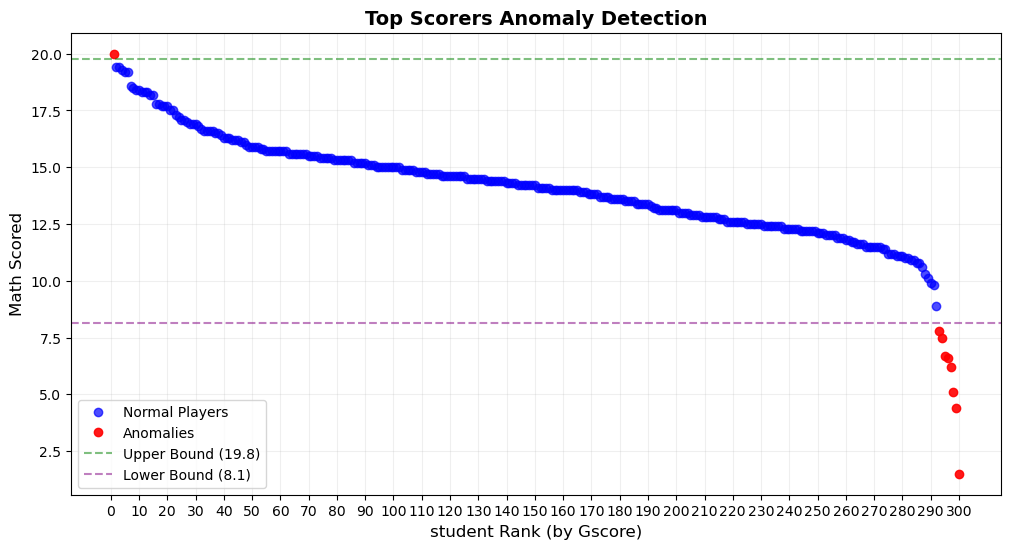

In [39]:
plot_anomaly_grade_IQR(grade_math,1.5)

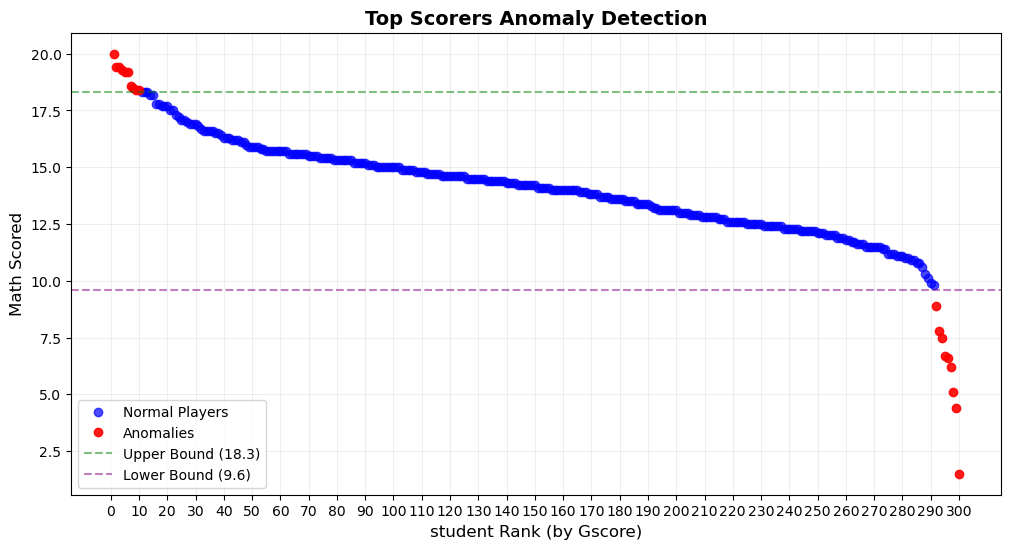

In [40]:
plot_anomaly_grade_IQR(grade_math,1)

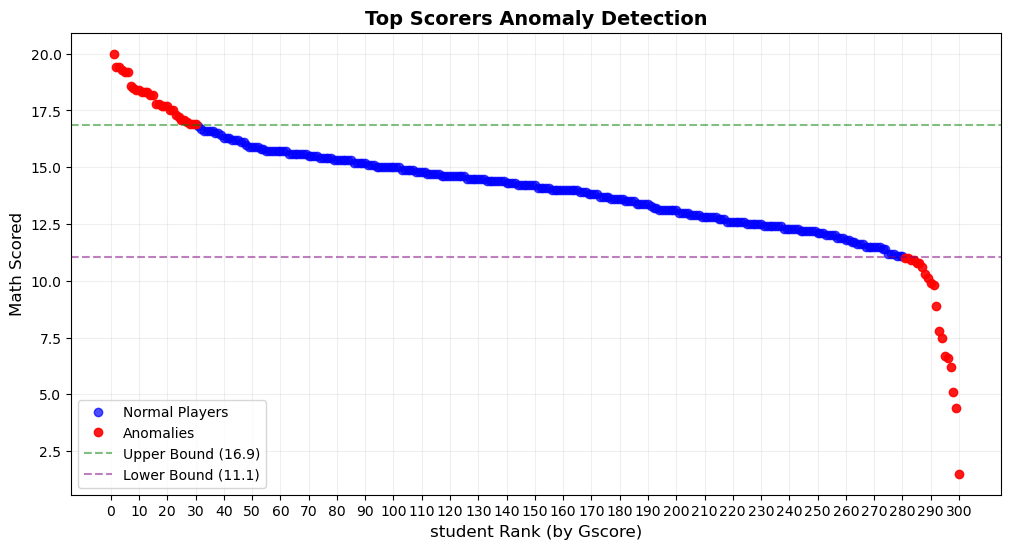

In [41]:
plot_anomaly_grade_IQR(grade_math,0.5)

In [ ]:
#""" تابع رسم نمودار گل‌های بازیکنان با تشخیص ناهنجاری  
#    پارامترها:
#    ----------
#   df : DataFrame
#        دیتافریم حاوی داده‌های بازیکنان
#    method : str (default: 'zscore')
#        روش تشخیص ناهنجاری ('zscore' یا 'iqr')
#    threshold : float (default: 2.0)
#        آستانه تشخیص ناهنجاری
#    """

In [42]:
def plot_anomaly_grade(score_data, method='zscore', threshold=2.0):
    # استخراج داده‌های نمره ها
    Grade = score_data['Grade'].copy().sort_values(ascending=False)
    ranks = np.linspace(1, len(Grade), len(Grade))
    
    # محاسبه آستانه‌ها بر اساس روش انتخابی
    if method == 'zscore':
        # روش Z-Score
        z_scores = np.abs(ss.zscore(Grade))
        upper_bound = threshold
        lower_bound = -threshold
        mask_anomalies = (z_scores > upper_bound)
    elif method == 'iqr':
        # روش IQR
        q1 = Grade.quantile(0.25)
        q3 = Grade.quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (threshold * iqr)
        lower_bound = q1 - (threshold * iqr)
        mask_anomalies = (Grade > upper_bound) | (Grade < lower_bound)
    else:
        raise ValueError("Method must be either 'zscore' or 'iqr'")
    
    # رسم نمودار
    plt.figure(figsize=(12, 6), dpi=100)
    
    # نقاط نرمال (آبی)
    plt.plot(ranks[~mask_anomalies], Grade[~mask_anomalies], 
             'o', color='blue', alpha=0.7, label='Normal Players')
    
    # نقاط ناهنجار (قرمز)
    plt.plot(ranks[mask_anomalies], Grade[mask_anomalies], 
             'o', color='red', alpha=0.9, label='Anomalies')
    
    # خطوط آستانه
    if method == 'iqr':
        plt.axhline(upper_bound, color='green', linestyle='--', 
                   alpha=0.5, label=f'Upper Bound ({upper_bound:.1f})')
        plt.axhline(lower_bound, color='purple', linestyle='--', 
                   alpha=0.5, label=f'Lower Bound ({lower_bound:.1f})')
    
    # تنظیمات نمودار
    plt.title('Top Scorers Anomaly Detection', fontsize=14, fontweight='bold')
    plt.xlabel('Player Rank (by Goals)', fontsize=12)
    plt.ylabel('Goals Scored', fontsize=12)
    plt.xticks(np.arange(0, len(Grade)+1, 10))
    plt.grid(True, alpha=0.2)
    plt.legend()
    
    # نمایش اطلاعات بازیکنان ناهنجار
    anomalies = grade_math.iloc[mask_anomalies.values][['Player', 'Team', 'Goals scored', 'Matches played']]
    print(f"Detected {len(anomalies)} anomalies:\n")
    print(anomalies.to_string(index=False))
    
    plt.show()